In [1]:
#call all the required library 
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
#calculate the Mth order Matrix 
def calc_matrix(x,m):
  n=len(x)
  #m=3
  A=np.zeros((n,m+1))
  for i in range(m+1):
      A[:,i]=x**i
      #A[:,1]=x
      #A[:,2]=np.square(x)
      #A[:,3]=x**3
  
  return A

In [3]:
#calculate the weight parameters using linear regression 
def calc_w(A,bt):
  #calculate w
  a1=np.dot(np.transpose(A),A)
  a1_inv=np.linalg.inv(a1)
#a1_inv.shape
  a2=np.dot(a1_inv,np.transpose(A))
  a3=np.dot(a2,bt)
  w=a3
  return w

In [4]:
#calculate weight vector for regularization
def calc_wreg(x_train,y_train,l):
  a1=np.dot(np.transpose(x_train),x_train)
  a1_inv=np.linalg.inv(a1)
  a2=np.dot(a1_inv,np.transpose(x_train))
  I=np.identity(len(a2))
  I_l=np.multiply(I,l)
  a2=a1+I_l
  a2_inv=np.linalg.inv(a2)
  a3=np.dot(a2_inv,np.transpose(x_train))
  wreg=np.dot(a3,y_train)
  yt=np.dot(x_train,wreg)
  return wreg

In [5]:
#calculate Eout
def calc_error(y_actual,xtest,wt):
  m=len(y_actual)
  #print(m)
  y_pred=np.dot(xtest,wt)
  e=sum(y_actual-y_pred)**2
  error=(np.sqrt(e))*(1/(2*m))
  return error
  #float(5)/float(10)

In [ ]:
#calculate Eout
#def calc_error(y_actual,xtest,wt):
 # m=len(y_actual)
  #print(m)
 # y_pred=np.dot(xtest,wt)
 # score = float(sum(abs(y_pred-y_actual)))/ float(len(y_actual))
 # error=1-score
 # return error*100

In [6]:
#calculate the clean observation without noise and plot the data 
def calc_data(delta):
  #delta=.01
  x=np.arange(-.5,.50001,delta)
  n=len(x)
  pii=math.pi
#if initial data was noiseless
  b_clean=np.sin(2*pii*x)
  return b_clean,x,n

In [7]:
#calculate the noisy observation 
def calc_noisy_data(b_clean,x,n):
  #now there are noisy initial data
  b0=b_clean-.1
  randomList = []
# Set a length of the list to 10
  for i in range(0, n):
    # any random numbers from 0 to 1000
      randomList.append((random.randint(-50, 50))/100)
  randn=np.array(randomList)

#generate b
  b=b0+.2*randn
  return b

In [8]:
#calculate E_avg matrix of 2nd order for n experiments
def calc_Eoutavg(exp_n,delta,x,b_clean,n):
  E_out2=np.zeros(exp_n)
  for i in range(exp_n):
    #b,x=calc_data(delta)
    A2=calc_matrix(x,2)
    #calculate different noisy observation for every step
    b=calc_noisy_data(b_clean,x,n)

#split the data into 80/20 (Training/Test Sets)
    from sklearn.model_selection import train_test_split
    X_train2, X_test2, y_train, y_test = train_test_split(A2, b, test_size=0.2, random_state=10)

    wt2=calc_w(X_train2,y_train)
#calculate y when m=2
    y2=np.dot(X_train2,wt2)
    E_out2[i]=calc_error(y_test,X_test2,wt2)
  #calculate average E_out
  E_out2_avg=np.average(E_out2)
  #print(E_out2)
  return E_out2_avg
#y3


In [9]:
#assign values to required variables
delta=[.1,.01,.005,.001,.0005]
k=len(delta)
N=np.zeros(k)
exp_no=30  
color=['r','green','blue','orange','black']   

In [10]:
#plot the clean input and output
def plot_ob(x,y,delta,color):
  #Plot clean input and observation
  plt.plot(x,y,color=color,label='delta='+str(delta),linewidth=1)  
  #plt.title('Observed value for inpu')
  plt.xlim([-.6,.6])
  plt.xlabel('Input X',fontsize='15')
  plt.ylabel('Clean Observation b (sin(2*pi*x)',fontsize='15')
  plt.legend(fontsize=10)

[  11.  101.  201. 1001. 2001.]


array([0.12676848, 0.06752232, 0.01135241, 0.00252309, 0.00182501])

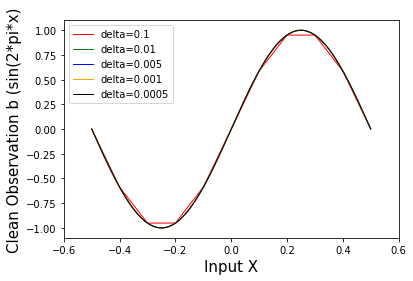

In [11]:
E2_out_avg=np.zeros(k)      #number of experiment
for j in range(k):
  b2,x2,N[j]=calc_data(delta[j])
  plot_ob(x2,b2,delta[j],color[j])
  E2_out_avg[j]=calc_Eoutavg(exp_no,delta[j],x2,b2,int(N[j]))
print(N)
E2_out_avg


In [12]:
#calculate E_avg matrix of 10th order for n experiments
def calc_Eoutavg10(exp_n,delta,x,b_clean,n):
  E_out10=np.zeros(exp_n)
  for i in range(exp_n):
    #b,x=calc_data(delta)
    A10=calc_matrix(x,10)
    #calculate different noisy observation for every step
    b=calc_noisy_data(b_clean,x,n)

#split the data into 80/20 (Training/Test Sets)
    from sklearn.model_selection import train_test_split
    X_train10, X_test10, y_train, y_test = train_test_split(A10, b, test_size=0.2, random_state=10)

    wt10=calc_w(X_train10,y_train)
#calculate y when m=2
    y10=np.dot(X_train10,wt10)
    E_out10[i]=calc_error(y_test,X_test10,wt10)
  #calculate average E_out
  E_out10_avg=np.average(E_out10)
  #print(E_out2)
  return E_out10_avg



[  11.  101.  201. 1001. 2001.]


array([0.05874218, 0.00600344, 0.00418365, 0.00198299, 0.00157441])

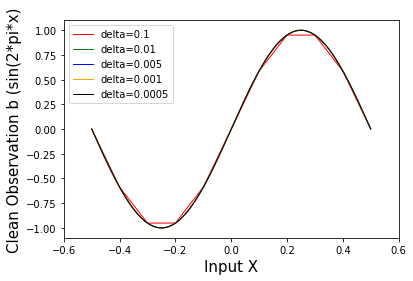

In [13]:
E10_out_avg=np.zeros(k)
for j in range(k):
  b10,x10,N[j]=calc_data(delta[j])
  plot_ob(x10,b10,delta[j],color[j])
  E10_out_avg[j]=calc_Eoutavg10(exp_no,delta[j],x10,b10,int(N[j]))
print(N)
E10_out_avg

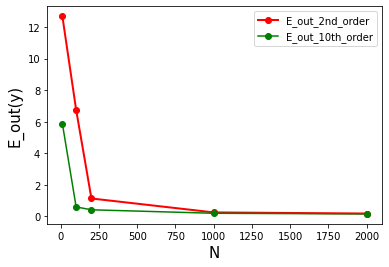

In [14]:
plt.plot(N,E2_out_avg*100,color='red',marker='o',label='E_out_2nd_order ',linewidth=2) 
plt.plot( N,E10_out_avg*100,color='green',marker='o',label='E_out_10th_order',linewidth=1.5)  
#plt.plot(x, y2,'r.',label='Prediction when m=2',linewidth=2) 
#plt.plot(x, y10,'r.',label='Prediction when m=10',linewidth=2) 
#plt.plot(x1, y_taylor,linestyle='--', marker='.',color='red',label='Taylor Series Calculation when m=3',linewidth=1)
plt.xlabel('N',fontsize='15')
plt.ylabel('E_out(y)',fontsize='15')
plt.legend()